<a href="https://colab.research.google.com/github/xxtanghuruxx/2022390627_-/blob/main/%EC%BD%94%ED%98%B8%ED%8A%B8%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C2022390627_%EC%9D%B4%ED%98%84%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cohort Analysis

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Understand Data

#### Load data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/online_retail_preprocessed.csv', index_col=False)

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [77]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  int64  
 7   Country      392692 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.0+ MB


In [9]:
for x in data.columns:
    print(x)
    print(data[x].values)

InvoiceNo
[536365 536365 536365 ... 581587 581587 581587]
StockCode
['85123A' '71053' '84406B' ... '23254' '23255' '22138']
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'CHILDRENS CUTLERY DOLLY GIRL '
 'CHILDRENS CUTLERY CIRCUS PARADE' 'BAKING SET 9 PIECE RETROSPOT ']
Quantity
[6 6 8 ... 4 4 3]
InvoiceDate
['2010-12-01 08:26:00' '2010-12-01 08:26:00' '2010-12-01 08:26:00' ...
 '2011-12-09 12:50:00' '2011-12-09 12:50:00' '2011-12-09 12:50:00']
UnitPrice
[2.55 3.39 2.75 ... 4.15 4.15 4.95]
CustomerID
[17850 17850 17850 ... 12680 12680 12680]
Country
['United Kingdom' 'United Kingdom' 'United Kingdom' ... 'France' 'France'
 'France']


### Preprocessing

In [12]:
df = data.copy()

#### Drop index col

#### Check Null values

In [14]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#### Drop missing values

In [15]:
df= df.dropna(subset=['CustomerID'])

In [16]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#### Check & Drop Duplicates

In [17]:
print(df.duplicated().sum())

0


In [18]:
df = df.drop_duplicates()


In [19]:
print(df.duplicated().sum())

0


#### Change Datatype
- customer ID: String

In [20]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
df.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [22]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692.000000,392692,392692.000000
mean,560590.875047,13.119702,2011-07-10 19:13:07.771892480,3.125914
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000
std,13087.063759,180.492832,NaN,22.241836


In [23]:
df.shape

(392692, 8)

#### Quantity & Unit Price Filter
- Filter Quantity > 0 & Unit Price > 0

In [24]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [25]:
df[df['StockCode'].str.len() == 1][['StockCode','Description']].value_counts()

,,count
StockCode,Description,
M,Manual,279


In [26]:
df[(df['Quantity']<0) & (df['InvoiceNo'] == 'C536379')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [27]:
df[(df['Quantity']<0) & (df['Description'] == 'Discount')][['StockCode','Description']].value_counts()

,,count
StockCode,Description,


In [28]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [29]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [30]:
df.shape

(392692, 8)

## EDA

In [36]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692.000000,392692,392692.000000
mean,560590.875047,13.119702,2011-07-10 19:13:07.771892480,3.125914
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000
std,13087.063759,180.492832,NaN,22.241836


In [37]:
df['CustomerID']

,CustomerID
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
392687,12680
392688,12680
392689,12680
392690,12680


### Understand Values

In [38]:
print(f"Number of unique invoices: {df['InvoiceNo'].nunique()}")
print(f"Number of unique products: {df['StockCode'].nunique()}")
print(f"Number of unique descriptions: {df['Description'].nunique()}")

Number of unique invoices: 18532
Number of unique products: 3665
Number of unique descriptions: 3877


In [39]:
print(f"Most common products:\n{df['Description'].value_counts().head(10)}")


Most common products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: count, dtype: int64


### Distribution of Qty

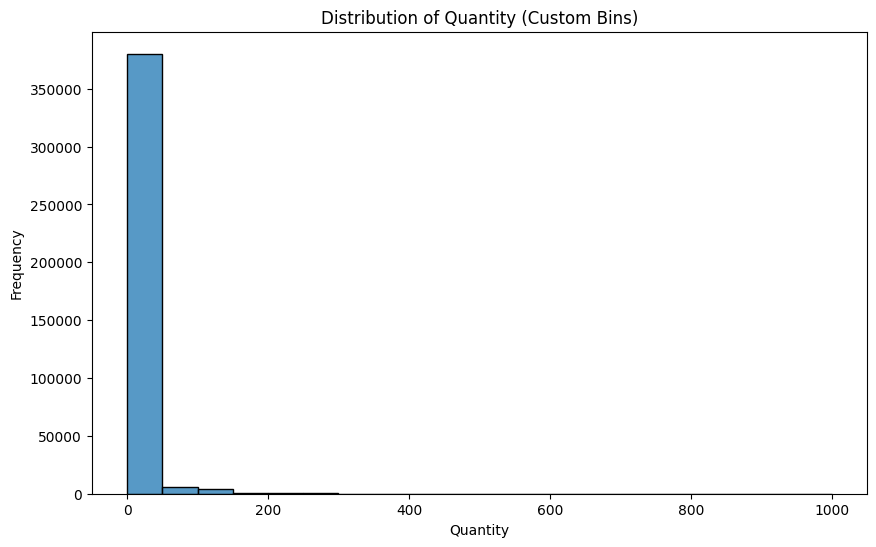

In [40]:
# Define custom bin ranges
bin_ranges = list(range(0, 1001, 50))  # Bins from 0 to 1000 in increments of 50

# Plot histogram with custom bins
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=bin_ranges, kde=False)
plt.title('Distribution of Quantity (Custom Bins)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


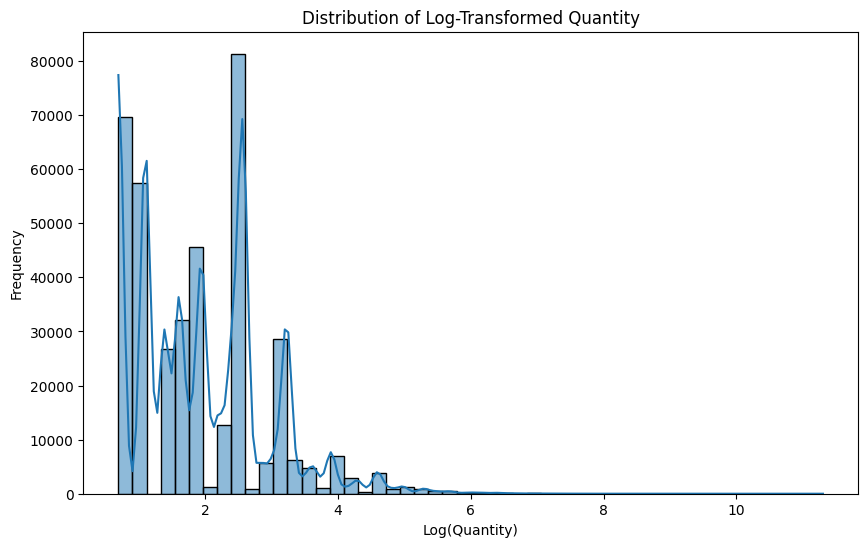

In [41]:
# Apply log transformation to Quantity
df['Log_Quantity'] = df['Quantity'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Plot histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Quantity'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Quantity')
plt.xlabel('Log(Quantity)')
plt.ylabel('Frequency')
plt.show()


### Distribution of Transaction

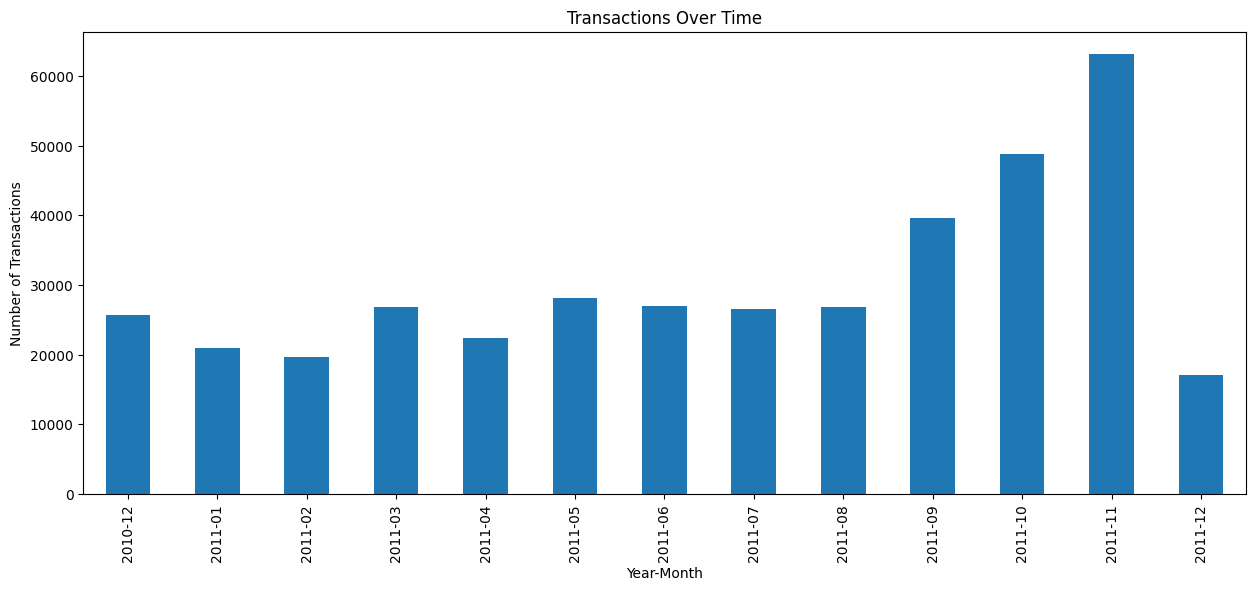

In [42]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(15, 6))
df['YearMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()

### Customer location


Country Analysis:
Number of unique countries: 37
Top 10 countries by transactions:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: count, dtype: int64


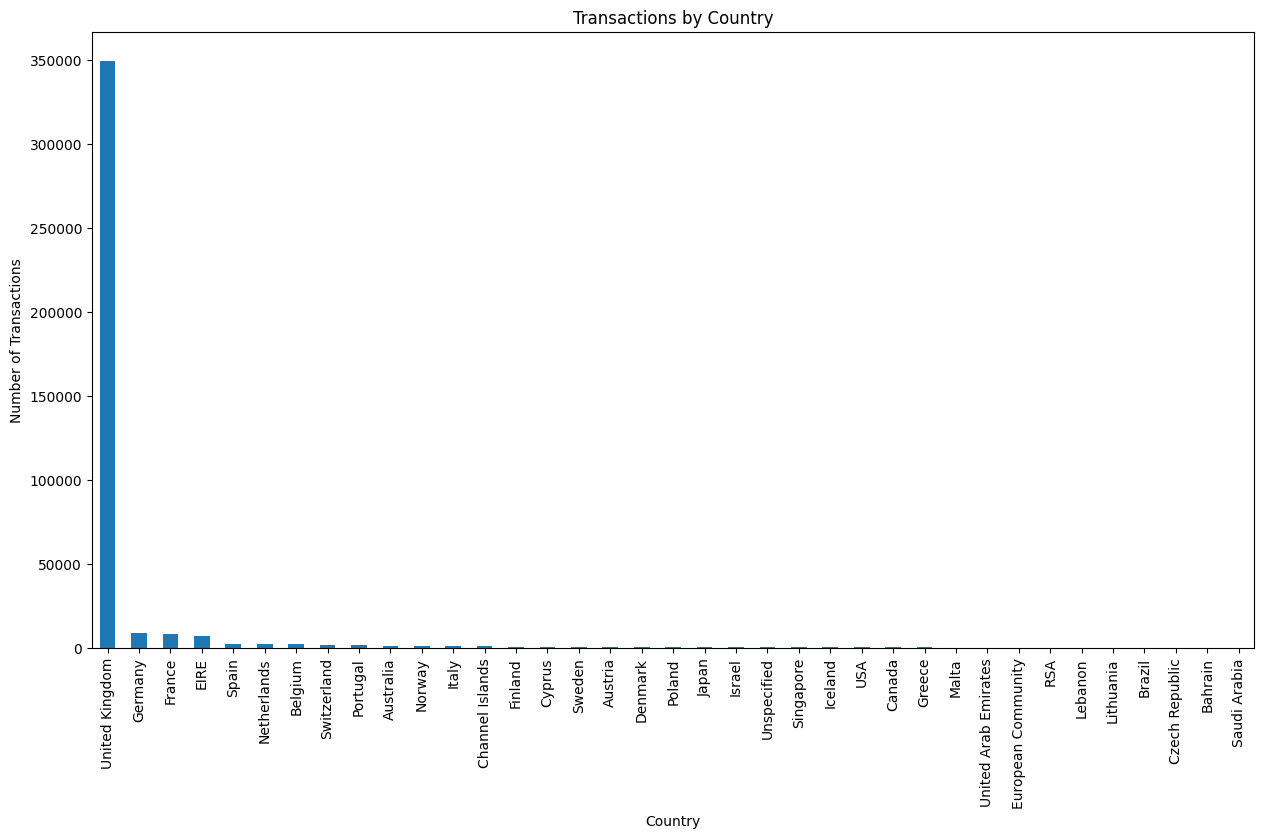

In [43]:
print("\nCountry Analysis:")
print(f"Number of unique countries: {df['Country'].nunique()}")
print(f"Top 10 countries by transactions:\n{df['Country'].value_counts().head(10)}")

# Transactions by country
plt.figure(figsize=(15, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Transactions by Country')
plt.ylabel('Number of Transactions')
plt.show()


## Cohort Analysis
- Cohort group: 고객의 첫번째 구매 날짜

In [44]:
df1 = df.copy()

In [45]:
### Get Month
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.date

In [46]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2.564949,2011-12,2011-12-09
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.945910,2011-12,2011-12-09
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,1.386294,2011-12,2011-12-09


#### Cohort Month: 고객의 첫 구매 날짜

In [47]:
### Get Cohort Month
df1['FirstOrderDate'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [48]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,2010-12,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01


In [49]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2.564949,2011-12,2011-12-09,2011-08-18
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.945910,2011-12,2011-12-09,2011-08-18
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09,2011-08-18
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09,2011-08-18
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,1.386294,2011-12,2011-12-09,2011-08-18


In [50]:
## Check value
df1[df1['CustomerID'] == '12680'][['InvoiceMonth', 'FirstOrderDate']].value_counts()

,,count
InvoiceMonth,FirstOrderDate,
2011-08-18,2011-08-18,20
2011-12-09,2011-08-18,15
2011-09-27,2011-08-18,10
2011-09-11,2011-08-18,7


In [51]:
df1[df1['CustomerID'] == '17850'][['InvoiceMonth', 'FirstOrderDate']].value_counts()

,,count
InvoiceMonth,FirstOrderDate,
2010-12-02,2010-12-01,213
2010-12-01,2010-12-01,84


In [52]:
df1.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Log_Quantity,float64
YearMonth,period[M]


### Cohort Index
- 각 코호트의 월별 활성과 고객수를 계산

In [53]:
### Change FirstOrderDate to dataframe dtype
df1['InvoiceMonth'] = pd.to_datetime(df1['InvoiceMonth'])
df1['FirstOrderDate'] = pd.to_datetime(df1['FirstOrderDate'])
# 월의 첫째날 가져오기
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df1['FirstOrderDate'] = df1['FirstOrderDate'].dt.to_period('M').dt.to_timestamp()

In [54]:
df1.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Log_Quantity,float64
YearMonth,period[M]


In [55]:
df1['FirstOrderDate'].value_counts()

,count
FirstOrderDate,
2010-12-01,167209
2011-01-01,47144
2011-03-01,33929
2011-02-01,30156
2011-04-01,19025
2011-10-01,15868
2011-05-01,15474
2011-09-01,14031
2011-06-01,13668


In [56]:
df1[['FirstOrderDate']].value_counts()

,count
FirstOrderDate,
2010-12-01,167209
2011-01-01,47144
2011-03-01,33929
2011-02-01,30156
2011-04-01,19025
2011-10-01,15868
2011-05-01,15474
2011-09-01,14031
2011-06-01,13668


In [57]:
df1[df1['FirstOrderDate'] == '2011-01-01'][['FirstOrderDate','InvoiceMonth']].value_counts()

FirstOrderDate  InvoiceMonth
2011-01-01      2011-01-01      10877
                2011-11-01       6248
                2011-10-01       4987
                2011-09-01       3768
                2011-05-01       3603
                2011-06-01       3214
                2011-03-01       3012
                2011-08-01       2844
                2011-07-01       2776
                2011-04-01       2290
                2011-02-01       2191
                2011-12-01       1334
Name: count, dtype: int64

In [58]:
df1['CohortIndex'] = (
    (df1['InvoiceMonth'].dt.year - df1['FirstOrderDate'].dt.year) * 12 +
    (df1['InvoiceMonth'].dt.month - df1['FirstOrderDate'].dt.month) #+ 1
)

In [59]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,2010-12,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0


In [60]:
df1[df1['CustomerID'] == '12680'][['InvoiceMonth', 'FirstOrderDate','CohortIndex']]

,InvoiceMonth,FirstOrderDate,CohortIndex
213350,2011-08-01,2011-08-01,0
213351,2011-08-01,2011-08-01,0
213352,2011-08-01,2011-08-01,0
213353,2011-08-01,2011-08-01,0
213354,2011-08-01,2011-08-01,0
213355,2011-08-01,2011-08-01,0
213356,2011-08-01,2011-08-01,0
213357,2011-08-01,2011-08-01,0
213358,2011-08-01,2011-08-01,0
213359,2011-08-01,2011-08-01,0


In [61]:
df1.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Log_Quantity,InvoiceMonth,FirstOrderDate,CohortIndex
count,392692.000000,392692.000000,392692,392692.000000,392692.000000,392692,392692,392692.000000
mean,560590.875047,13.119702,2011-07-10 19:13:07.771892480,3.125914,1.929854,2011-06-26 04:55:07.630407680,2011-02-20 03:31:01.477188096,4.147599
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000,0.693147,2010-12-01 00:00:00,2010-12-01 00:00:00,0.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,1.098612,2011-04-01 00:00:00,2010-12-01 00:00:00,0.000000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000,1.945910,2011-07-01 00:00:00,2011-01-01 00:00:00,3.000000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000,2.564949,2011-10-01 00:00:00,2011-04-01 00:00:00,7.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,11.302155,2011-12-01 00:00:00,2011-12-01 00:00:00,12.000000
std,13087.063759,180.492832,NaN,22.241836,1.000779,NaN,NaN,3.850198


In [62]:
cohort_counts = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['CustomerID']
    .nunique() #각 그룹의 고유 고객 수(CustomerID)를 직접 계산)
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_counts


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retention Rate table
- Customer retention Rate(고객 유지율): 전체 고객 중 얼마나 많은 고객이 여전히 활성 상태인지 이해하는 데 매우 유용한 지표 -> 유지는 "총 고객 수"와 비교하여 "활성 고객의 비율"을 제공

In [64]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.round(3) * 100 #백분율 표시

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cohort_size

,0
FirstOrderDate,
2010-12-01,885.0
2011-01-01,417.0
2011-02-01,380.0
2011-03-01,452.0
2011-04-01,300.0
2011-05-01,284.0
2011-06-01,242.0
2011-07-01,188.0
2011-08-01,169.0


#### Retention Heatmap

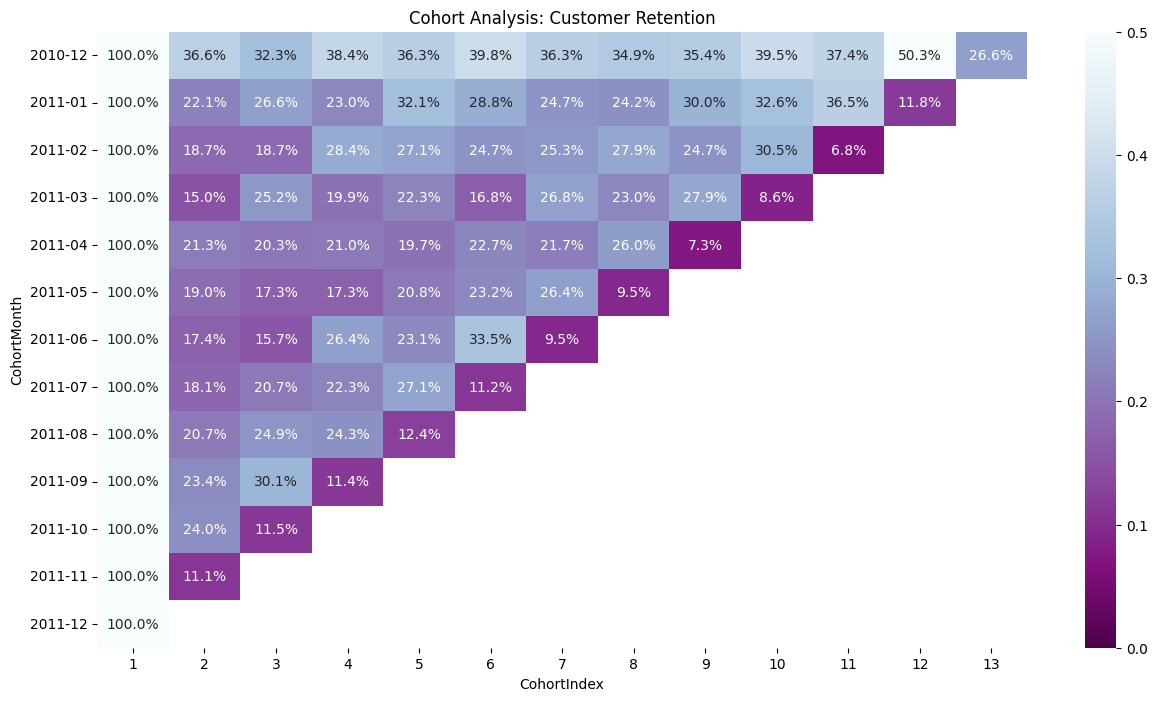

In [84]:
plt.figure(figsize=(15, 8))
plt.title('Cohort Analysis: Customer Retention')
sns.heatmap(data=retention,annot = True,fmt = '.1%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

### Average Qty for each Cohort

In [69]:
average_quantity = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Quantity']
    .mean()
    .unstack()
    .round(1)
)

In [70]:
average_quantity

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.2,17.7,19.0,13.6,15.4
2011-01-01,17.5,13.5,12.7,15.3,12.8,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02-01,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03-01,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05-01,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Average Qty Heatmap

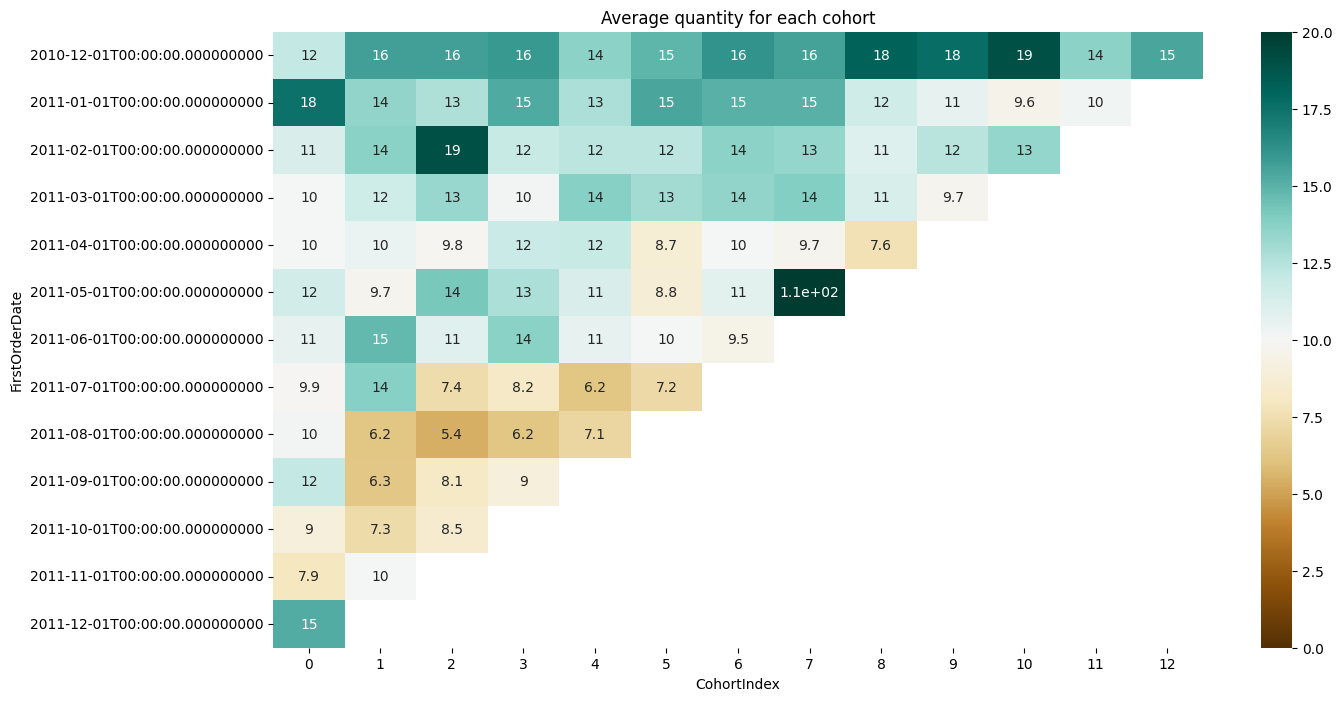

In [71]:
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BrBG")
plt.show()

### Net Revenue by Cohort

In [72]:
df1['Sales'] = df1['Quantity'] * df1['UnitPrice']

In [73]:
cohort_revenue = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Sales'].sum()
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_revenue


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02-01,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03-01,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04-01,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05-01,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


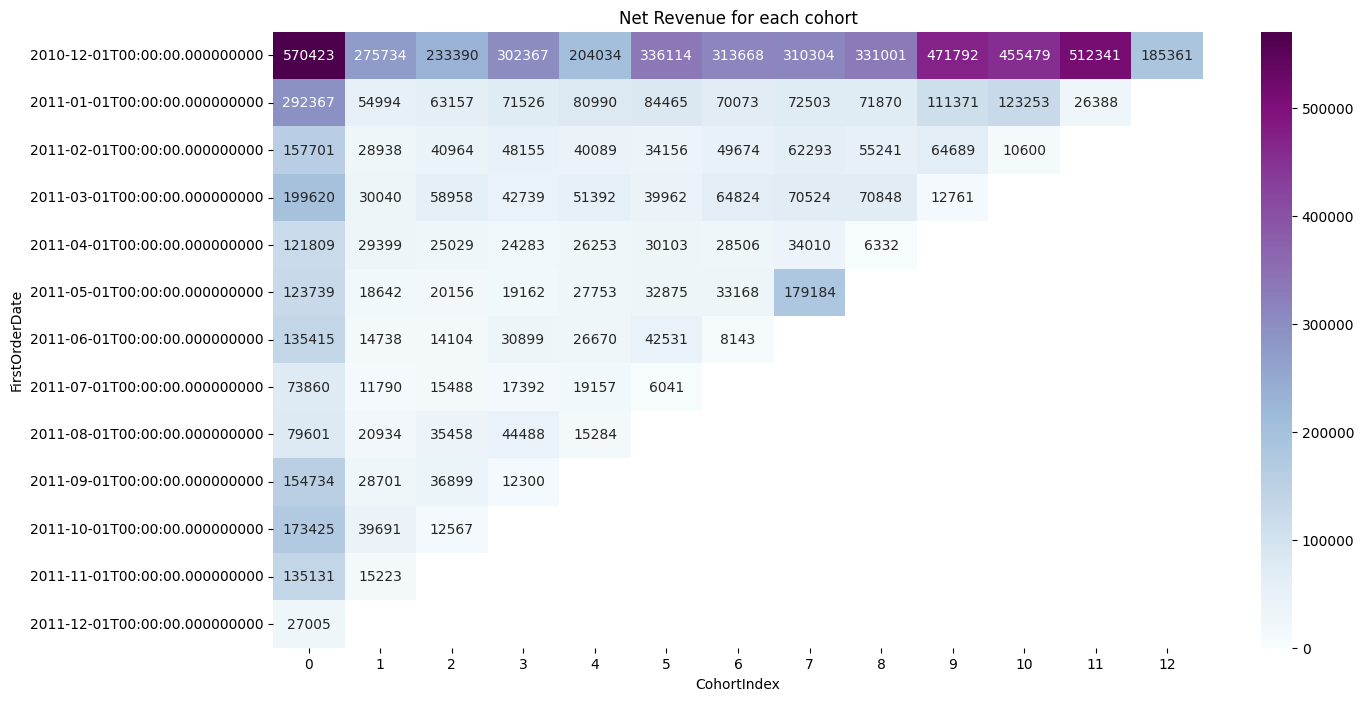

In [74]:
plt.figure(figsize=(15, 8))
plt.title('Net Revenue for each cohort')
sns.heatmap(data=cohort_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="BuPu")
plt.show()

### Cohort Cumulative Lifetime Revenue

In [75]:
cohort_cumulative_revenue = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Sales'].sum()
    .unstack()  # Reshapes the grouped data into a pivot table
    .cumsum(axis=1)  # Calculates the cumulative sum across columns (CohortIndex)
)
cohort_cumulative_revenue


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,570422.730,846157.200,1079547.670,1381915.110,1585949.490,1922063.180,2235731.340,2546035.370,2877036.440,3348828.570,3804307.470,4316648.550,4502009.52
2011-01-01,292366.840,347360.700,410517.710,482043.800,563033.570,647498.140,717571.490,790074.910,861945.391,973316.091,1096568.951,1122956.981,NaN
2011-02-01,157700.590,186638.230,227602.700,275758.090,315847.260,350002.930,399676.640,461969.440,517210.780,581899.640,592499.860,NaN,NaN
2011-03-01,199619.670,229660.010,288618.420,331357.500,382749.940,422712.270,487536.420,558060.040,628907.660,641668.760,NaN,NaN,NaN
2011-04-01,121809.051,151207.641,176236.211,200519.001,226772.161,256875.401,285381.301,319390.911,325722.911,NaN,NaN,NaN,NaN
2011-05-01,123739.300,142381.000,162536.730,181698.900,209451.520,242326.860,275495.200,454679.430,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,150153.290,164257.660,195156.220,221826.120,264357.210,272500.430,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,85650.071,101138.441,118530.371,137687.191,143727.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,100534.900,135993.380,180481.030,195765.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


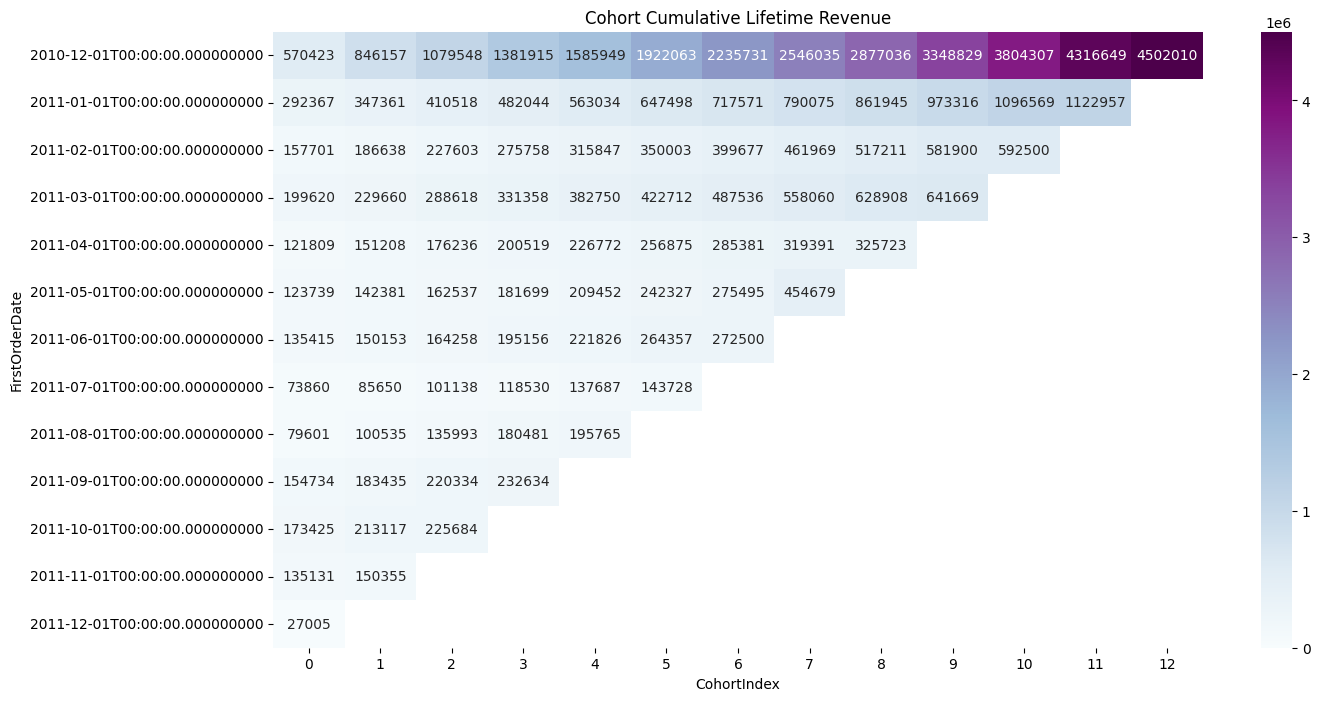

In [76]:
plt.figure(figsize=(15, 8))
plt.title('Cohort Cumulative Lifetime Revenue')
sns.heatmap(data=cohort_cumulative_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="BuPu")
plt.show()

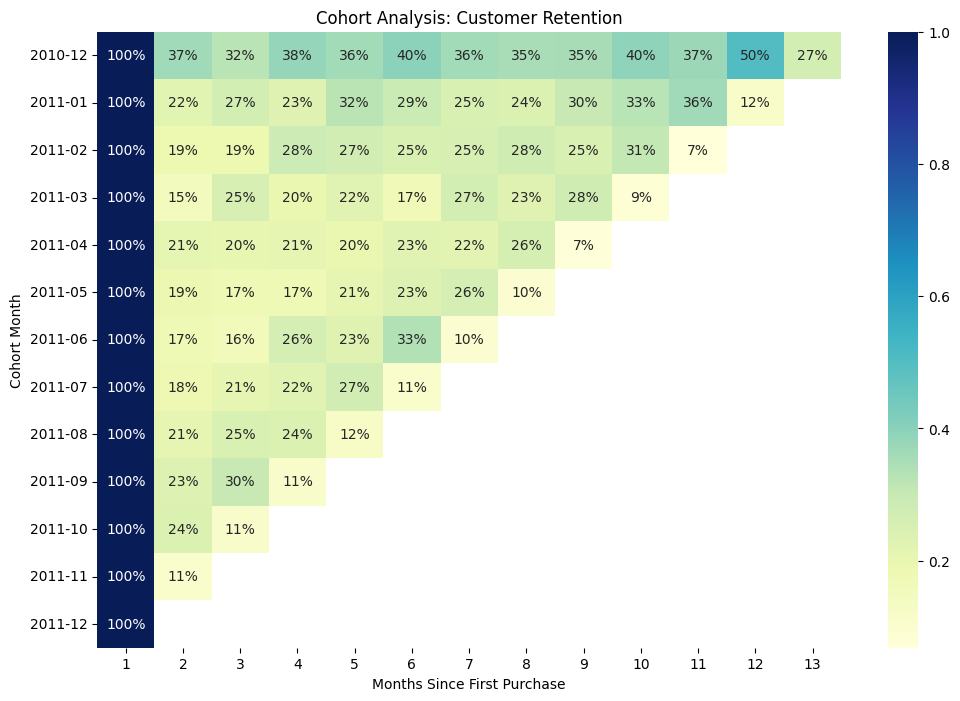

In [80]:
import pandas as pd
import datetime as dt

# 1. 데이터 불러오기
# 파일을 불러올 때 적절한 경로와 파일명을 사용하세요.
# df = pd.read_csv('your_file.csv')

# 2. InvoiceDate를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. 고객의 최초 구매일 파악
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')  # 월별로 변환
cohort = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
cohort.rename(columns={'InvoiceMonth': 'CohortMonth'}, inplace=True)

# 4. 원본 데이터와 최초 구매 정보를 병합
df = df.merge(cohort, on='CustomerID')

# 5. Cohort Index 생성 (고객이 특정 CohortMonth에 몇 번째 달에 구매했는지 계산)
df['CohortIndex'] = (
    (df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year) * 12 +
    (df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month) + 1
)

# 6. 코호트 분석 테이블 생성
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_table = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# 7. 유지율 계산
cohort_size = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_size, axis=0)

# 8. 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12 ,  8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis: Customer Retention')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()


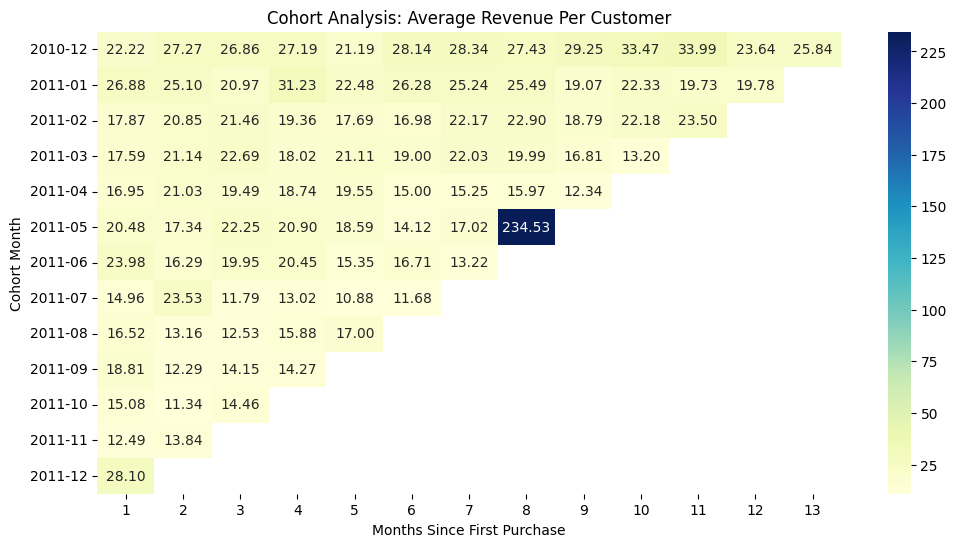

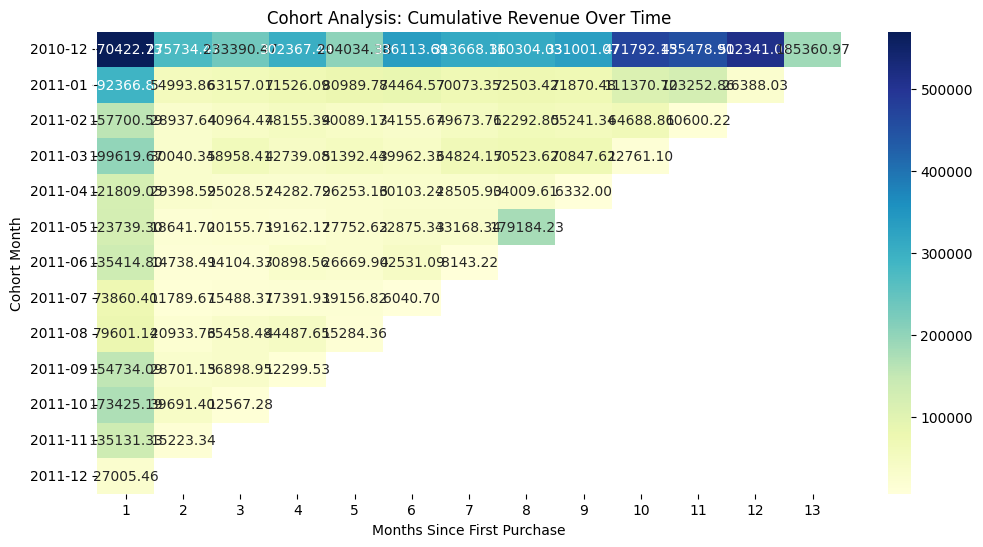

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기 (파일 경로에 맞춰 수정)
# df = pd.read_csv('your_file.csv')

# 2. InvoiceDate를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. 'TotalPrice' 컬럼 추가: Quantity * UnitPrice (각 거래의 총 금액 계산)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 4. 고객의 최초 구매일 파악
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')  # 월별로 변환
cohort = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
cohort.rename(columns={'InvoiceMonth': 'CohortMonth'}, inplace=True)

# 5. 원본 데이터와 최초 구매 정보를 병합
# 'CohortMonth' 컬럼 이름을 'FirstCohortMonth'로 변경하여 중복을 방지
cohort.rename(columns={'CohortMonth': 'FirstCohortMonth'}, inplace=True)
df = df.merge(cohort, on='CustomerID')

# 6. Cohort Index 생성 (고객이 특정 CohortMonth에 몇 번째 달에 구매했는지 계산)
df['CohortIndex'] = (
    (df['InvoiceMonth'].dt.year - df['FirstCohortMonth'].dt.year) * 12 +  # 'CohortMonth'를 'FirstCohortMonth'로 변경
    (df['InvoiceMonth'].dt.month - df['FirstCohortMonth'].dt.month) + 1  # 'CohortMonth'를 'FirstCohortMonth'로 변경
)

# 7. 평균 구매액 분석
cohort_avg_revenue = df.groupby(['FirstCohortMonth', 'CohortIndex'])['TotalPrice'].mean().reset_index() # 'CohortMonth'를 'FirstCohortMonth'로 변경
cohort_avg_revenue = cohort_avg_revenue.pivot(index='FirstCohortMonth', columns='CohortIndex', values='TotalPrice') # 'CohortMonth'를 'FirstCohortMonth'로 변경

# 8. 코호트별 누적 매출 분석
cohort_cumulative_revenue = df.groupby(['FirstCohortMonth', 'CohortIndex'])['TotalPrice'].sum().reset_index() # 'CohortMonth'를 'FirstCohortMonth'로 변경
cohort_cumulative_revenue = cohort_cumulative_revenue.pivot(index='FirstCohortMonth', columns='CohortIndex', values='TotalPrice') # 'CohortMonth'를 'FirstCohortMonth'로 변경

# 9. 평균 구매액 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_avg_revenue, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cohort Analysis: Average Revenue Per Customer')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

# 10. 누적 매출 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_cumulative_revenue, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cohort Analysis: Cumulative Revenue Over Time')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

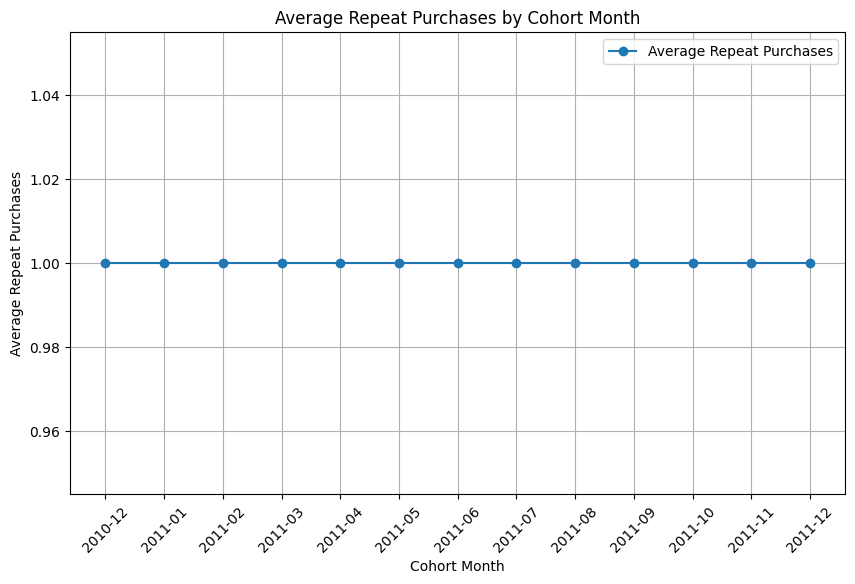

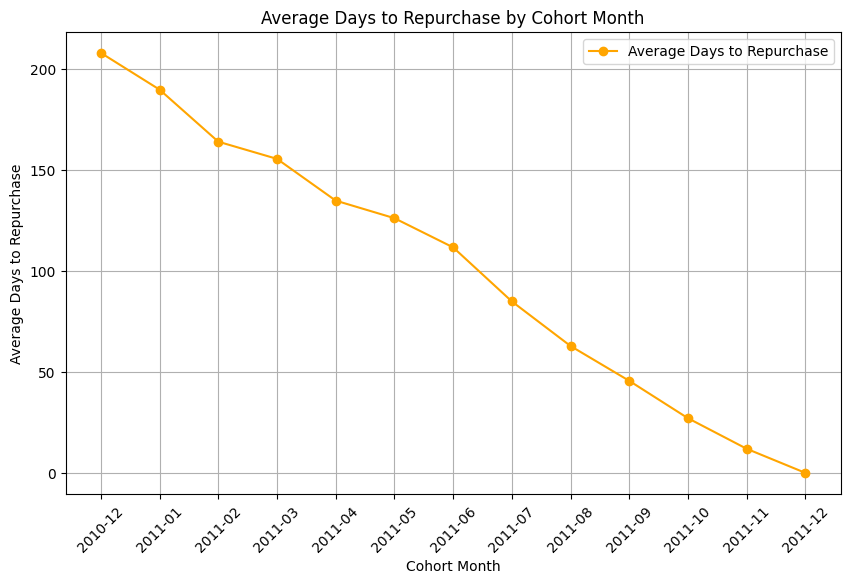

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (파일 경로에 맞게 수정)
# df = pd.read_csv('your_file.csv')

# 2. InvoiceDate를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. 고객별 첫 구매와 모든 구매 정렬
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])
df['FirstPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')

# 4. 재구매 여부 플래그 추가
df['IsRepeatPurchase'] = (df['InvoiceDate'] > df['FirstPurchaseDate']).astype(int)

# 5. 고객별 재구매 횟수 및 평균 재구매 시간 계산
repeat_analysis = df[df['IsRepeatPurchase'] == 1].copy()  # 재구매만 필터링
repeat_analysis['DaysSinceFirstPurchase'] = (repeat_analysis['InvoiceDate'] - repeat_analysis['FirstPurchaseDate']).dt.days
repeat_summary = repeat_analysis.groupby('CustomerID').agg(
    RepeatCount=('IsRepeatPurchase', 'sum'),
    AvgDaysToRepurchase=('DaysSinceFirstPurchase', 'mean')
).reset_index()

# 6. 코호트 기반 재구매 분석: CohortMonth 생성
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

cohort_repeat_analysis = repeat_analysis.groupby(['CohortMonth']).agg(
    AvgRepeatCount=('IsRepeatPurchase', 'mean'),
    AvgDaysToRepurchase=('DaysSinceFirstPurchase', 'mean')
).reset_index()

# 7. 재구매 관련 시각화
# (1) 코호트별 평균 재구매 횟수
plt.figure(figsize=(10, 6))
plt.plot(cohort_repeat_analysis['CohortMonth'].astype(str), cohort_repeat_analysis['AvgRepeatCount'], marker='o', label='Average Repeat Purchases')
plt.title('Average Repeat Purchases by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Average Repeat Purchases')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# (2) 코호트별 평균 재구매까지 소요 시간
plt.figure(figsize=(10, 6))
plt.plot(cohort_repeat_analysis['CohortMonth'].astype(str), cohort_repeat_analysis['AvgDaysToRepurchase'], marker='o', color='orange', label='Average Days to Repurchase')
plt.title('Average Days to Repurchase by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Average Days to Repurchase')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()
